# Data resctruction

In [233]:
import json as js
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import traceback
import re

In [234]:
description = pd.read_csv('./data/stories_description.csv')

In [235]:
description.shape

(959, 2)

In [236]:
one_ting = js.loads(description['story_json'][0])
sec_tong = js.loads(description['story_json'][3])

In [237]:
one_ting.keys()

dict_keys(['guid', 'type', 'description', 'properties', 'content'])

In [238]:
sec_tong.keys()

dict_keys(['guid', 'type', 'properties', 'content'])

so, keys are different

In [239]:
sec_tong['properties']

{'name': 'Что делать на Faces & Laces',
 'background': {'gradient': {'colors': [], 'direction': 'vertical'},
  'blur': False},
 'icon_background': {'image_url': 'https://static2.tinkoff.ru/portfolio/stories/images/fl1_1.jpg',
  'gradient': {'colors': [{'hex': '#000000', 'alpha': 0},
    {'hex': '#000000', 'alpha': 0.6}],
   'direction': 'vertical'},
  'blur': False},
 'hide_page_status': False}

In [240]:
combo = 0
for n in range(1, 960):
    try:
        a = js.loads(description['story_json'][n]).keys()
    except:
        combo+=1
print(f'{combo/960*100}% of data causes errors with js.load')

70.41666666666667% of data causes errors with js.load


In [241]:
for n in range(1, 10):
    element = description['story_json'][n]
    core = re.search('"name":"[^"]*"', element)
    if core != None:
        print(core.group()[8:-1])
    else:
        print('None')

Пополнить «Стрелку»
Тинькофф Инвестиции 2.0
Что делать на Faces & Laces
Необычные виды спорта
Скрытые карты
Как хранить карту
Рестораны для дружеских встреч
Рюкзаки для школы
Что такое овердрафт


In [242]:
for n in range(1, 6):
    element = description['story_json'][n]
    core = re.search('"image_url":"[^"]*"', element)
    if core != None:
        print(core.group()[13:-1])
    else:
        print('None')

None
https://static2.tinkoff.ru/portfolio/stories/images/investicii_11-05_zahod.jpg
https://static2.tinkoff.ru/portfolio/stories/images/fl1_1.jpg
https://static2.tinkoff.ru/portfolio/stories/images/neobichnie_vidi_sporta_02-04_zahod.jpg
None


hmmmm, 2 + 2 is 4, minus 1 is 3 quick math

In [243]:
def image_info(element):
    core = re.search('"icon_url":"[^"]*"', element)
    if core != None:
        return core.group()[12:-1]
    else:
        core = re.search('"image_url":"[^"]*"', element)
        if core != None:
            return core.group()[13:-1]
        else:
            return None       

In [244]:
description['image_data'] = [image_info(description['story_json'][n]) for n in range(959)]

In [245]:
description.head(3)

,story_id,story_json,image_data
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""...",https://static2.tinkoff.ru/portfolio/stories/i...
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""...",https://static2.tinkoff.ru/portfolio/stories/i...
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""...",https://static2.tinkoff.ru/portfolio/stories/i...


In [246]:
def name_info(element):
    core = re.search('"name":"[^"]*"', element)
    if core != None:
        return core.group()[8:-1]
    else:
        return None

In [247]:
description['name_data'] = [name_info(description['story_json'][n]) for n in range(959)]

In [248]:
description[description['name_data']==None]

,story_id,story_json,image_data,name_data


In [249]:
description[description['image_data']==None]

,story_id,story_json,image_data,name_data


In [253]:
description.head(4)

,story_id,story_json,image_data,name_data
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""...",https://static2.tinkoff.ru/portfolio/stories/i...,Изменить пин-код
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""...",https://static2.tinkoff.ru/portfolio/stories/i...,Пополнить «Стрелку»
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""...",https://static2.tinkoff.ru/portfolio/stories/i...,Тинькофф Инвестиции 2.0
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""...",https://static2.tinkoff.ru/portfolio/stories/i...,Что делать на Faces & Laces


In [255]:
description.drop('story_json', axis=1, inplace=True)

In [261]:
description.to_csv('./data/restructed_stories_description.csv', index = False)

# Stories' analysis

In [299]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from imageio import imread

In [333]:
url = description['image_data'][0]

with urlopen(url) as file:
    img = imread(file.read())

img.shape

(264, 264, 4)

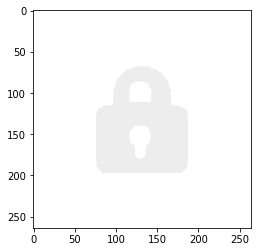

In [344]:
# some images are white, so we need to multiply with 20
imgplot = plt.imshow(img*20)
plt.show()

## what about using vgg16 for image classification?

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

model = VGG16()

print(model.summary())

 25731072/553467096 [>.............................] - ETA: 1:49:59

In [ ]:
image = img #load_img('./pictures/door.jpg', target_size=(224, 224))
image = img_to_array(image)  #output Numpy-array

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)
yhat = model.predict(image)

label = decode_predictions(yhat)
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))